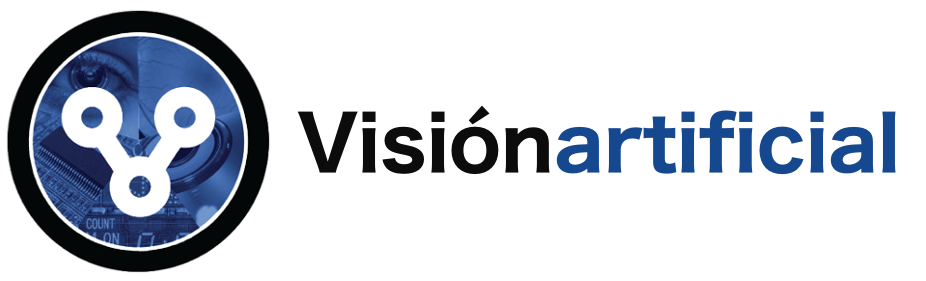

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos DENSE</font>

O detector de puntos clave Dense é, con diferenza, o detector de puntos clave máis sinxelo. En esencia, todo o que tes que facer é marcar cada **k** píxel da imaxe como un punto clave. Este detector utilízase principalmente en imaxes de escenas naturais como praias, cordilleiras, campos de herba, etc. onde as deteccións estándar de esquinas e blobs non funcionan tan ben, e obtemos unha maior precisión marcando píxeles igualmente espaciados como puntos clave.

Aínda que este método é bastante sinxelo, tamén ten o inconveniente de sobremostrar a imaxe, o que significa que se detectan demasiados puntos clave. Cantos máis puntos clave se detecten, máis descritores hai que calcular. E cantos máis descritores se calculen, (1) máis tempo leva o proceso de descrición e (2) máis espazo necesita o noso sistema para almacenar os descritores calculados.


# <font style="color:rgb(50,120,229)">Obxectivo:</font>
Neste caderno, exploraremo o detector de puntos clave DENSE.

# <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave STAR?</font>

O detector Dense marca cada k píxel da imaxe como un punto clave. Por exemplo, na seguinte imaxe marcamos cada k=20 píxeles un puntos clave:


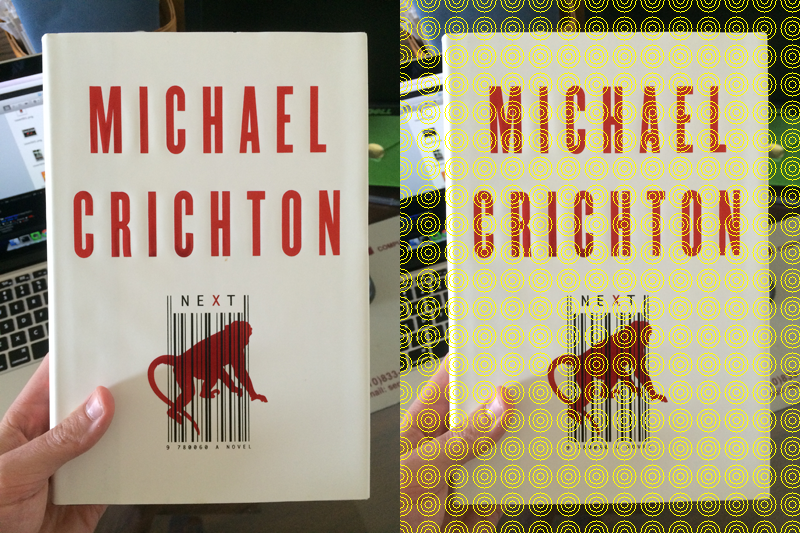

Todos e cada un dos puntos amarelos debuxados na imaxe corresponden a un punto clave.

E esta vez, marcamos cada k=40 píxeles como puntos clave:

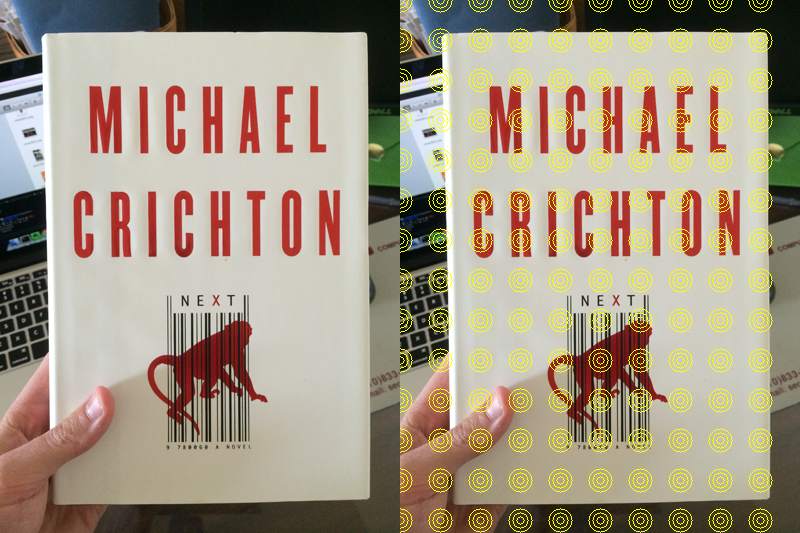

Fíxate como cando utilizamos un espazamento de 40 píxeles detectamos menos píxeles (centros dos círculos pintados). Ao aumentar o espazamento, diminuirá o número de píxeles marcados como puntos clave.

Entón, por que se usa o detector de puntos clave Dense?

Despois de todo, non ten algoritmos nin heurísticas detrás que definan o "importante" ou "interesante" que é unha rexión dunha imaxe. E aínda que isto é certo, a través do traballo de Fei-Fei e Perona no seu artigo [A Bayesian Hierarchical Model for Learning Natural Scene Categories](./artigos/feifei_2005.pdf), descubrimos que marcar cada **k** píxeles como puntos clave tende a superar a outros detectores de puntos clave como FAST, Harris, DoG, etc.

Neste punto, probablemente esteas a preguntar como é posible isto? Outros métodos de detección de puntos clave como FAST e Harris definen algoritmicamente un procedemento para detectar rexións interesantes dunha imaxe. E agora estás dicindo que é mellor marcar cada k píxel que che atopes como un punto clave? A resposta é si, **para algunhas aplicacións**, simplemente marcar cada k píxel nunha imaxe é máis eficaz que algunhas das técnicas máis avanzadas. Isto é especialmente certo para dominios de escenas naturais, como conxuntos de datos de praias, bosques, montañas, etc.

Non obstante, o detector Dense supón unha importante carga computacional e de almacenamento. Aínda que o propio detector é extremadamente rápido de executar, tamén devolve moitos, moitos máis puntos clave que un simple detector de blobs ou esquinas. Polo tanto, é necesario almacenar máis descritores, o que leva a un aumento dos tempos de execución para a extracción de descritores e un aumento dos requisitos de almacenamento para gardar estes descritores no disco.

O detector de puntos clave Dense tampouco é inherentemente invariante de escala. Para combater isto, normalmente extraemos puntos clave densos con radios variables (e ás veces superpostos como vemos na figura):

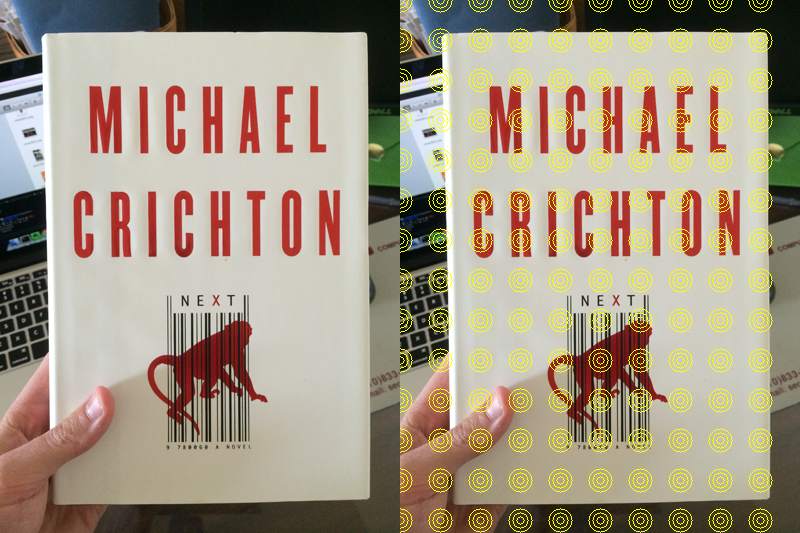

Aquí, detectamos puntos clave densos usando raios de $r=4,8,12$. Non obstante, agora necesitamos extraer $3 \times n$ o número de descritores! Isto aumenta aínda máis os nosos requisitos de cálculo e almacenamento.

Obviamente, usar o detector de puntos clave Dense non é prudente para sistemas en tempo real ou con recursos limitados: as demandas de cálculo e almacenamento son simplemente demasiado altas.

Non obstante, os detectores de puntos clave densos adoitan ser excelentes para tarefas como a clasificación de imaxes mediante a aprendizaxe automática e a Recuperación de imaxes baseada no contido (é dicir, os motores de busca de imaxes).

## Para que se emprega Dense?

O detector Dense, en realidade, non "detecta" nada. Simplemente marca cada k píxel da imaxe como un punto clave.


## Exemplo de uso do detector Dense:

O detector Dense está implementado en OpenCV 2.4 pero non en OpenCV 3+. É bastante trivial crear o teu propio detector dense que recorre unha imaxe e marca cada k píxel como un punto clave. Vexamos a continuación como:


In [1]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def dense(image, step, radius):
	# incilizamos a lista de keypoints
	kps = []

	# lazo sobre filas e columnas da imaxe, colle un `paso`
	# en cada direccion
	for x in range(0, image.shape[1], step):
		for y in range(0, image.shape[0], step):
			# creamos un keypoint e engadimolo a lista de keypoints
			kps.append(cv2.KeyPoint(x, y, radius * 2))

	# retornamos o lista denda de keypoints
	return kps

# dense keypoints: 336
# dense + multi-radios keypoints: 1008


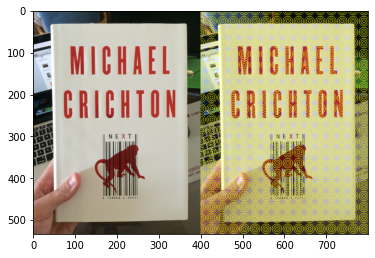

In [4]:
#cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Establecemos o paso
step = 26


# inicilalizamos a lista de keypoint e a tupla de radios
kps = []
radii = (4, 8, 12)

# detecamos os puntos clase de  Dense para OpenCV 3+
rawKps = dense(gray,step, 1)

# lazo sobre os keypoint se refinar
for rawKp in rawKps:
	#lazo sobre os radios que imos a empregar
	for r in radii:
		# construimos manualmente un keypoit e enegadimolo a lista
		kp = cv2.KeyPoint(x=rawKp.pt[0], y=rawKp.pt[1], _size=r * 2)
		kps.append(kp)

# mostramos a informacion
print("# dense keypoints: {}".format(len(rawKps)))
print("# dense + multi-radios keypoints: {}".format(len(kps)))

# lazo sobre os keypoint e anotamolos cun circulo
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 1)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));